<a href="https://colab.research.google.com/github/poojakota17/Data-Mining-255/blob/main/Dimesnsionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

In [31]:
#importing the dataset
import numpy as np
import matplotlib.pyplot as plt


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Image Dataset

## I have applied dimensionality reduction on fashion_mnist dataset. It consists of image dataset of clothes and their corresponding labels.

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()

The shape of dataset looks like below. It has 60,000 rows with 28x28 pixels 

In [4]:
train_X.shape

(60000, 28, 28)

In [5]:
train_test = np.vstack([train_X, test_X])
train_test.shape

(70000, 28, 28)

Reshaped the data to do dimensionality reduction.

In [6]:
train_test=train_test.reshape(70000,784)

In [7]:
train_test.shape

(70000, 784)

For the further process, I am taking only a subset of dataset : 5000 rows.

In [8]:
y = train_test[0:5000,0]
train_test = train_test[0:5000,1:]

In [9]:
train_test.shape

(5000, 783)

## PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_test_2D = pca.fit_transform(train_test)

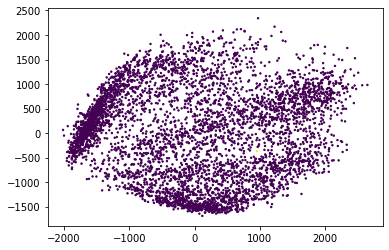

In [13]:
plt.scatter(train_test_2D[:,0], train_test_2D[:,1], c = y, s = 2.0)

## SVD

In [14]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
train_test_2D = svd.fit_transform(train_test)

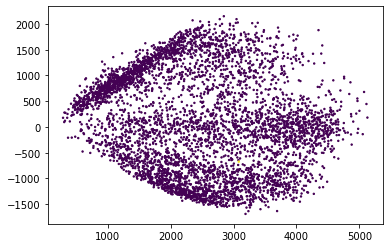

In [15]:
plt.scatter(train_test_2D[:,0], train_test_2D[:,1], c = y, s = 2.0)

## UMAP

In [10]:
import umap
umap = umap.UMAP(n_components=2)
train_test_2D = umap.fit_transform(train_test)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


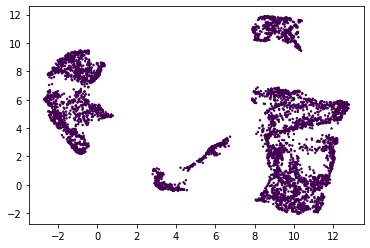

In [11]:
plt.scatter(train_test_2D[:,0], train_test_2D[:,1], c = y, s = 2.0)

## t-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
train_test_2D = tsne.fit_transform(train_test)

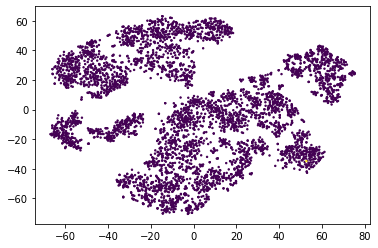

In [18]:
plt.scatter(train_test_2D[:,0], train_test_2D[:,1], c = y, s = 2.0)

## LLE

In [21]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_neighbors=30,n_components=2)
train_test_2D = embedding.fit_transform(train_test)

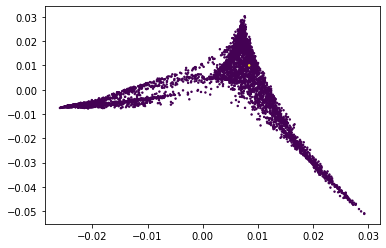

In [22]:
plt.scatter(train_test_2D[:,0], train_test_2D[:,1], c = y, s = 2.0)

## ISOMAP

In [19]:
from sklearn.manifold import Isomap
isomap=Isomap(n_neighbors=30, n_components=2)
train_test_2D = isomap.fit_transform(train_test)

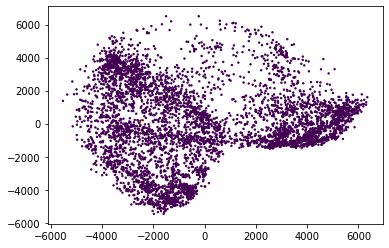

In [20]:
plt.scatter(train_test_2D[:,0], train_test_2D[:,1], c = y, s = 2.0)

To show image recovery after dimensionality reduction using PCA and SVD, I have also used a captcha dataset.

## Captcha dataset to show how images are preserved after dimensionality reduction using PCA and SVD

> Downloaded the dataset from kaggle and then reshaped it to work upon.

In [45]:
# from glob
import  glob
import cv2
from numpy import asarray
import pandas as pd

from matplotlib import image
train_data= glob.iglob('/content/drive/MyDrive/samples/samples/*.png',recursive = True)
captcha=[]
images=[]

for file in train_data:
  n=cv2.imread(file)
  images.append(n)
  captcha.append(n)
#   # print(file)
#   captcha.append(n)

captcha=np.asarray(captcha)

captcha=captcha.reshape(1040,-1)

In [ ]:
# images=np.concatenate(images).ravel()

In [46]:
print(captcha.shape)

(1040, 30000)


In [47]:
print(captcha)

[[192 192 192 ... 254 254 254]
 [192 192 192 ... 254 254 254]
 [192 192 192 ... 254 254 254]
 ...
 [192 192 192 ... 254 254 254]
 [192 192 192 ... 254 254 254]
 [192 192 192 ... 254 254 254]]


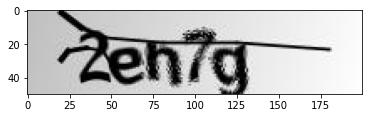

In [48]:
plt.imshow(images[0])

In [37]:
def plot_images(images, total_images=20):
    fig = plt.figure() # create a new figure window
    for i in range(total_images): # display 20 images
        # subplot : 4 rows and 5 columns
        # img_grid = fig.add_subplot(rows, cols, i+1)
        # plot features as image
        plt.imshow(images[i])

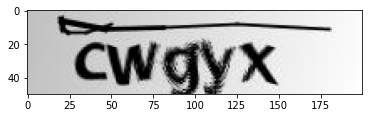

In [49]:
plot_images(images)

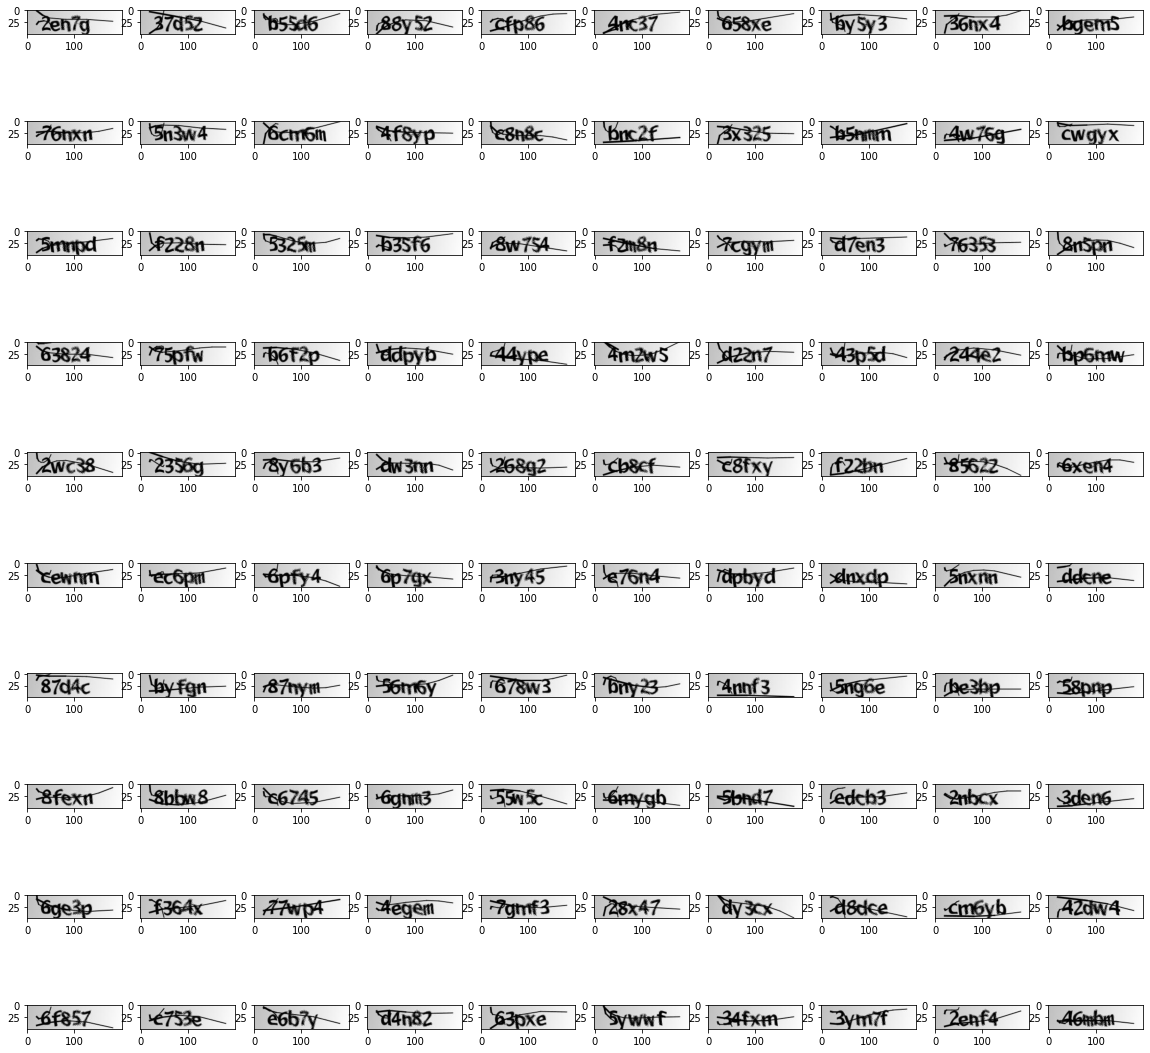

In [50]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(20,20))

for i,ax in enumerate(axes.flat):
# for i in range(20):  
    ax.imshow(images[i])

Now we will do PCA for 90% variance coverage

In [40]:
pca_data=captcha
print(pca_data.shape)

(1040, 10000)


## PCA on captcha dataset

> For a 90% coverage variance, I have run PCA

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90) # we need 90% variance
converted_data = pca.fit_transform(pca_data)

> After running PCA for 90% variance, the dimensions reduced to 289 from 10000

In [42]:
print(converted_data.shape)

(1040, 289)


In [43]:
new_data=pca.inverse_transform(converted_data)
print(new_data.shape)

(1040, 10000)


After reducing the dimesnsion the images looks like below and it is still understandable.

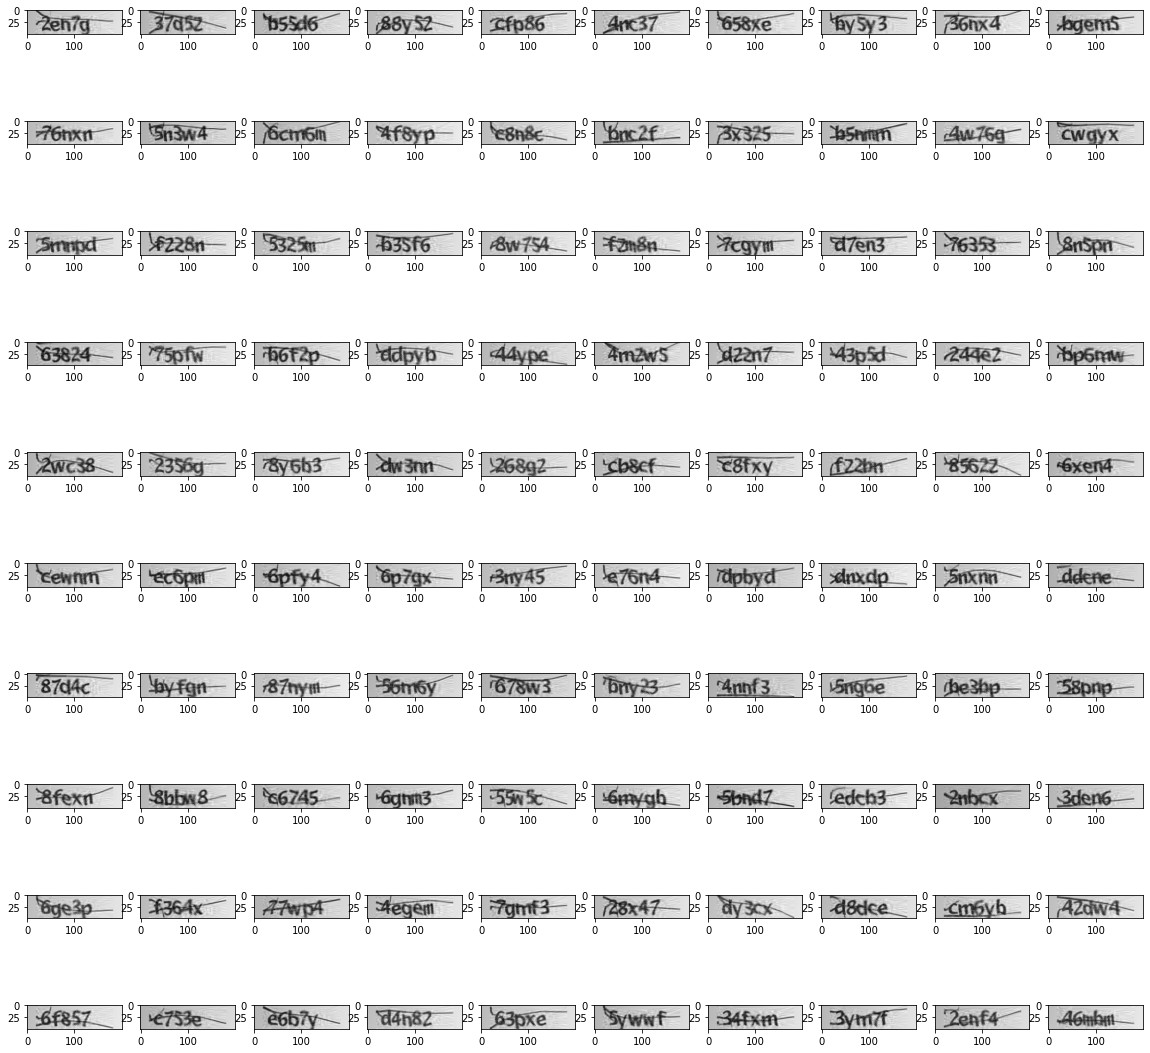

In [44]:
fig, axes = plt.subplots(10,10, figsize=(20,20))
for i, ax in enumerate(axes.flat):
 ax.imshow(new_data[i].reshape(50,200),cmap='gray')

We can see that we are able to cover 90 % of variance with 289 features and the reduced image can be seen above, which is almost 90% similar to the original one.

## Singular Value Decomposition

In [ ]:
svd_data=captcha
print(svd_data.shape)

(1040, 10000)


We will first try with 100 components

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
X_svd = svd.fit_transform(svd_data)

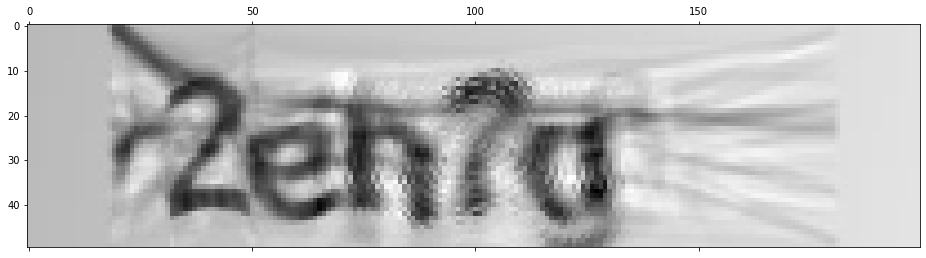

In [ ]:
image = svd.inverse_transform(X_svd[0].reshape(1, -1))
plt.matshow(image.reshape((50, 200)), cmap = "gray")
plt.show()

In [ ]:
svd = TruncatedSVD(n_components=289)
X_svd = svd.fit_transform(svd_data)

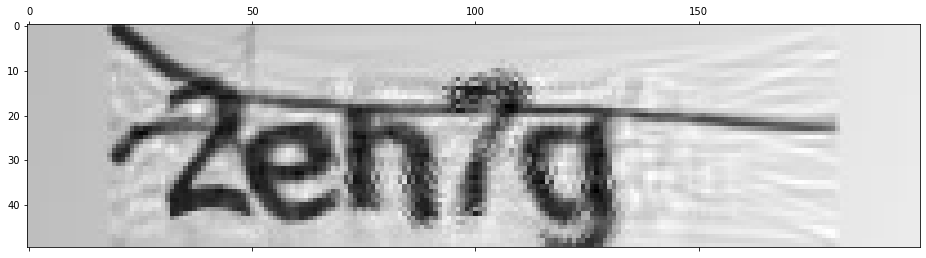

In [ ]:
image = svd.inverse_transform(X_svd[0].reshape(1, -1))
plt.matshow(image.reshape((50, 200)), cmap = "gray")
plt.show()

In [ ]:
svd = TruncatedSVD(n_components=500)
X_svd = svd.fit_transform(svd_data)

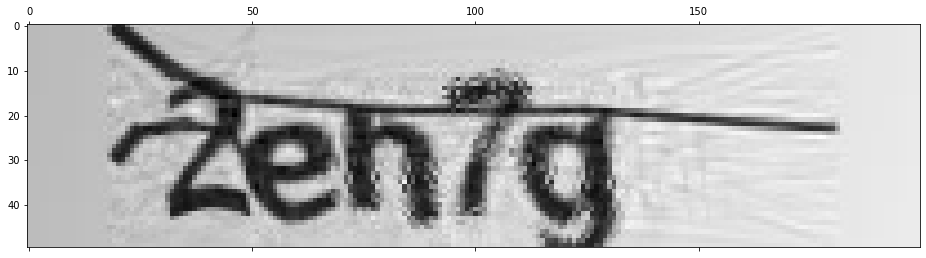

In [ ]:
image = svd.inverse_transform(X_svd[0].reshape(1, -1))
plt.matshow(image.reshape((50, 200)), cmap = "gray")
plt.show()

With 400 components we are able to get a better picture.

# LLE

In [ ]:
lle_data=captcha
lle_data.shape

(1040, 10000)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2) #result has 289 dimensions
X_transformed = embedding.fit_transform(lle_data)

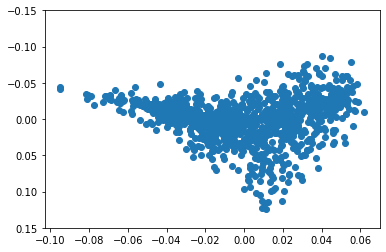

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_transformed[:, 0], X_transformed[:, 1],cmap=plt.get_cmap('rainbow'))
ax.set_ylim(0.15, -0.15);

### TSNE

With TSNE there is a huge loss of data in the captcha dataset.

In [ ]:
from sklearn.manifold import TSNE
tsne_data=captcha
embedding = TSNE(n_components=2) #result has 289 dimensions
X_transformed = embedding.fit_transform(tsne_data)

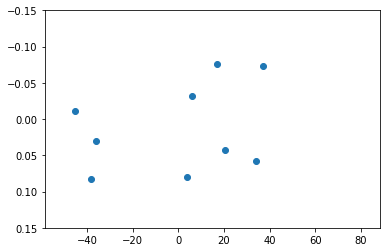

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_transformed[:, 0], X_transformed[:, 1],cmap=plt.get_cmap('rainbow'))
ax.set_ylim(0.15, -0.15);

In [3]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 86 kB 2.5 MB/s 
     |████████████████████████████████| 1.1 MB 10.5 MB/s 
     |████████████████████████████████| 15.8 MB 663 bytes/s 
     |████████████████████████████████| 76 kB 4.6 MB/s 
     |████████████████████████████████| 793 kB 48.7 MB/s 
     |████████████████████████████████| 132 kB 49.4 MB/s 
     |████████████████████████████████| 791 kB 37.9 MB/s 
     |████████████████████████████████| 786 kB 38.6 MB/s 
     |████████████████████████████████| 779 kB 47.3 MB/s 
     |████████████████████████████████| 778 kB 47.2 MB/s 
     |████████████████████████████████| 776 kB 46.4 MB/s 
     |████████████████████████████████| 769 kB 49.9 MB/s 
     |████████████████████████████████| 766 kB 35.1 MB/s 
     |████████████████████████████████| 1.0 MB 38.7 MB/s 
     |████████████████████████████████| 722 kB 51.9 MB/s 
     |████████████████████████████████| 722 kB 52.3 MB/s 
     |████████████████████████████████| 715 kB 45.8 MB/s 
     |█████████

# Tabular data

> This is a heart disease dataset with features like people's age,gender, blood pressure, cholesterol etc. The cardio columns says whether the person has heart disease or not.

In [27]:
import pandas as pd
df = pd.read_csv("https://kmeanscluster.s3.amazonaws.com/newHeartDataset.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


> The dataset has 70000 records, for applying dimesnionality reduction, I am using 500 rows.

In [28]:
print(df.shape)

(70000, 13)


In [29]:
df=df.iloc[0:500]

In [30]:
print(df.shape)

(500, 13)


> Splitting the dataset into train and test 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
classifier = ensemble.GradientBoostingClassifier(n_estimators=500,
          max_depth= 4,
          min_samples_split= 5,
          learning_rate=0.01)
df_new=pd.DataFrame(df,columns=['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
X_train, X_test, y_train, y_test = train_test_split(df_new, df['cardio'], test_size=0.25, random_state=12)

## Classification with taking all the features came out to be 70%

In [32]:
classifier.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

> The accuracy score with all the dimensions is 70%.

In [33]:
 print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69        61
           1       0.71      0.72      0.71        64

    accuracy                           0.70       125
   macro avg       0.70      0.70      0.70       125
weighted avg       0.70      0.70      0.70       125



## PCA

> Now with reducing the dimesnsions using 2 PCA components, the accuracy score is 62%.

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2) #result has 2 dimensions
X_pca =pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)

In [ ]:
classifier.fit(X_pca, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print(classification_report(y_test, classifier.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.80      0.31      0.45      8791
           1       0.57      0.92      0.70      8709

    accuracy                           0.62     17500
   macro avg       0.68      0.62      0.58     17500
weighted avg       0.69      0.62      0.58     17500



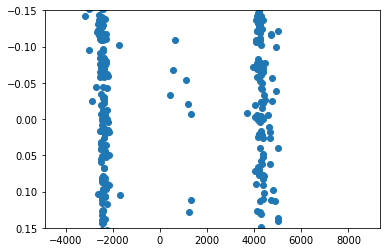

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1],cmap=plt.get_cmap('rainbow'))
ax.set_ylim(0.15, -0.15);

## LLE

> With LLE the accuracy score is very less: 47%.

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2) #result has 2 dimensions
X_transformed_lle = embedding.fit_transform(X_train)
X_test_lle=embedding.fit_transform(X_test)

In [ ]:
classifier.fit(X_transformed_lle, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print(classification_report(y_test, classifier.predict(X_test_lle)))

              precision    recall  f1-score   support

           0       0.41      0.12      0.19      8791
           1       0.48      0.82      0.61      8709

    accuracy                           0.47     17500
   macro avg       0.44      0.47      0.40     17500
weighted avg       0.44      0.47      0.40     17500



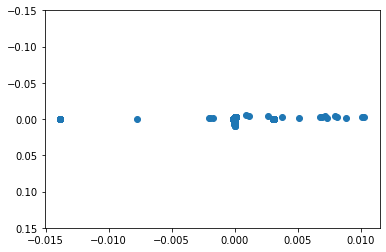

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_transformed_lle[:, 0], X_transformed_lle[:, 1],cmap=plt.get_cmap('rainbow'))
ax.set_ylim(0.15, -0.15);

## SVD

> With SVD the accuracy score is 59%, comparable to PCA.

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train)
y_svd=svd.fit_transform(X_test)
classifier.fit(X_svd, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print(classification_report(y_test, classifier.predict(y_svd)))

              precision    recall  f1-score   support

           0       0.79      0.26      0.39      8791
           1       0.55      0.93      0.69      8709

    accuracy                           0.59     17500
   macro avg       0.67      0.59      0.54     17500
weighted avg       0.67      0.59      0.54     17500



(0.15, -0.15)

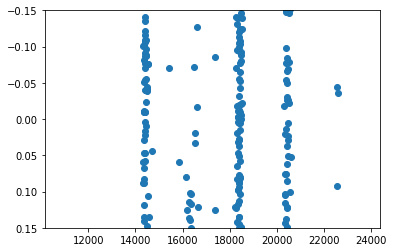

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_svd[:, 0], X_svd[:, 1],cmap=plt.get_cmap('rainbow'))
ax.set_ylim(0.15, -0.15)

## ISOMAP

> With ISOMAP the accuracy score is 51%.

In [37]:
from sklearn.decomposition import PCA
from sklearn.manifold import ( Isomap, TSNE,)
import umap
isomap=Isomap(n_components=2)
X_iso = isomap.fit_transform(X_train)
y_iso=isomap.fit_transform(X_test)
# classifier.fit(X_iso, y_iso)

In [41]:
classifier.fit(X_iso, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [42]:
print(classification_report(y_test, classifier.predict(y_iso)))

              precision    recall  f1-score   support

           0       0.50      0.02      0.03        61
           1       0.51      0.98      0.67        64

    accuracy                           0.51       125
   macro avg       0.51      0.50      0.35       125
weighted avg       0.51      0.51      0.36       125



In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_iso[:, 0], X_iso[:, 1],cmap=plt.get_cmap('rainbow'))
ax.set_ylim(0.15, -0.15)

## t-SNE

> With t-SNE the accuracy score is 58%.

In [44]:
from sklearn.manifold import TSNE
import umap
# um=umap.UMAP(n_components=2)
tsne=TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)
y_tsne=tsne.fit_transform(X_test)


In [45]:
classifier.fit(X_tsne, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
print(classification_report(y_test, classifier.predict(y_tsne)))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69        61
           1       0.82      0.22      0.35        64

    accuracy                           0.58       125
   macro avg       0.68      0.58      0.52       125
weighted avg       0.68      0.58      0.51       125



In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],cmap=plt.cm.hot)
ax.set_ylim(0.15, -0.15)

## UMAP

> With UMAP the accuracy score is only 50%.

In [48]:
 um=umap.UMAP(n_components=2)
 X_umap = um.fit_transform(X_train)
x_test_umap=um.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [50]:
classifier.fit(X_umap, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [51]:
print(classification_report(y_test, classifier.predict(x_test_umap)))

              precision    recall  f1-score   support

           0       0.49      0.75      0.60        61
           1       0.53      0.27      0.35        64

    accuracy                           0.50       125
   macro avg       0.51      0.51      0.48       125
weighted avg       0.51      0.50      0.47       125



(0.15, -0.15)

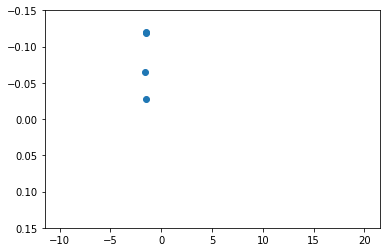

In [55]:
fig, ax = plt.subplots()
ax.scatter(X_umap[:, 0], X_umap[:, 1],cmap=(df['cardio']*1.))
ax.set_ylim(0.15, -0.15)

# Comparison of techniques for image dataset

> The best clustering result was with UMAP for image dataset.

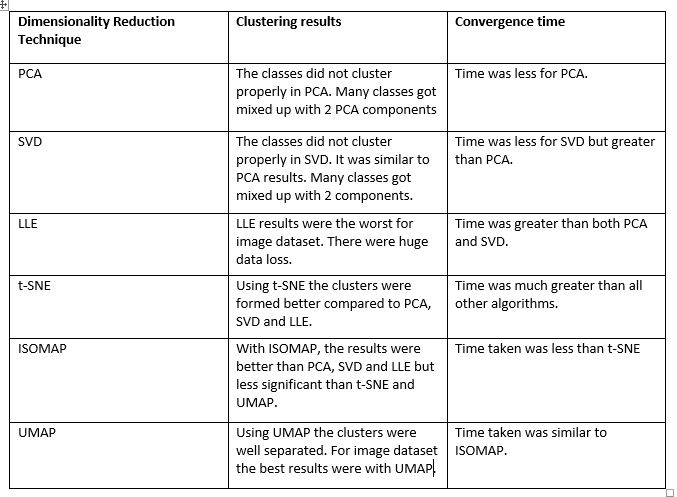

# Comparison of techniques for Tabular dataset

> The best classification accuracy was with PCA with 62% compared to the actual accuracy of 70% with taking all the features.

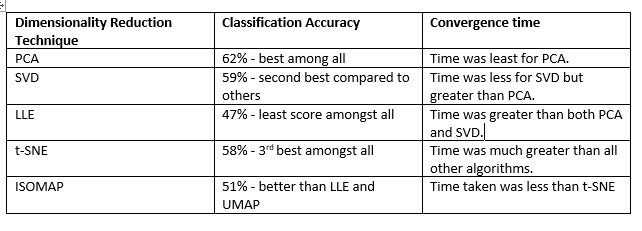